<h1 style="text-align:center">Sniffer: a simple path search algorithm</h1>

<p>The algorithm is based on a dog sniffing for something. It chooses the direction with the strongest smell. The smell is inversely proportional to distance and is blocked by obstacles, so if there is an obstacle in the direction of the shortest distance, the sniffer  swerves and sniffs again. So that a matrix 2d represents the potential space, where obstacles have potential 1, free path has potential 0 and goal has potential -1 (like a hole). The smell is calculated by inverse of the Euclidian distance.</p>

<img src="static/Sniffing.jpg">

In [1]:
import math
import numpy as np
from random import randrange, uniform

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class sniffer():
    def __init__(self, dim_x: int, dim_y: int):
        """
        Constructor class 
        :param dim_x: x dimension of the space
        :param dim_y: y dimension of the space
        """
        
        self.dim_x, self.dim_y = dim_x, dim_y
        self.x, self.y = np.arange(dim_x), np.arange(dim_y)
        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.potential = np.zeros((self.dim_y, self.dim_x))
        
    
    def setGoal(self, x: int, y: int, r: int=1):
        """
        set the space "goal" position
        :param x:  x coordinate
        :param y:  y coordinate
        :param r:  radius of the goal. Like a tolerable err
        """
        self.xg, self.yg, self.r_goal = x, y, r
        
    def smell(self, x: int, y: int):
        """
        To a valid posicion, return 1/goal distance. To a position equal
        to the goal position, return 2. To a invalid posicion (obstacles),
        return -1
        
        :param x:  x coordinate
        :param y:  y coordinate
        """
        if self.potential[y][x] == 1:
            return -1
        if (x == self.xg) and (y == self.yg):
            return 2
        else:
            inv_d = 1/math.sqrt(math.pow((x-self.xg), 2) + math.pow((y-self.yg), 2))
            return inv_d

    # r² = (x - xo)² + (y-y0)² 
    def setCircularObject(self, x0: int, y0: int, r: float, p: float):
        """
        set a object in potential space. If the object is the goal, 
        a negative potential is idicate. If the object is a obstacle, 
        the potential must be 1. 
        :param x0:  x coordinate of the object center
        :param y0:  y coordinate of the object center
        :param r: radius of the object
        :param p: potential of the object
        """
    
        for i in range(self.dim_x):
            for j in range(self.dim_y):
                if math.sqrt( math.pow((self.X[i][j]-x0),2) + math.pow((self.Y[i][j]-y0),2)) <= r:
                    self.potential[i][j] = p
    
    
    def setCircularObstacle(self, x0: int, y0: int, r: float):
        """
        set a obstacle in potential space. The potential of a obstacle
        must be 1
        :param x0:  x coordinate of the obstacle center
        :param y0:  y coordinate of the obstacle center
        :param r: radius of the obstacle
        :param p: potential of the obstacle
        """
    
        self.setCircularObject(x0=x0, y0=y0, r=r, p=1)
    
    def setCircularGoal(self, x0: int, y0: int, r: float):
        """
        set a circular goal representation in potential space. The 
        potential of a obstacle must be 1
        :param x0:  x coordinate of the center
        :param y0:  y coordinate of the center
        :param r: radius of the goal representation
        :param p: potential of the representation
        """
    
        self.setCircularObject(x0=x0, y0=y0, r=r, p=-1)
                    

    def Sniff(self, i_max: int, x0: int, y0: int, step: int=1, max_step: int=5): 
        """
        Find the way to the goal.  
        :param x0:  x coordinate of the search start
        :param y0:  y coordinate of the search start
        :param step: search step
        :param max_step: max search step
        :param i: maximum search iterations
        
        return two lists: 'x' with the x coordinates of the way and 
        'y' with the y coordinates.
        
        """
        
        x, y = [x0], [y0]
#       lt    t     rt 
#       l           r         
#       lb    b     rb
# 
#       [top, right-top, right, right-bottom, bottom, left-bottom, left, left-top]  
        dtype = [('x', int), ('y', int), ('inv-distance', float)]
        movements = np.zeros(8, dtype= dtype)
        finded = False
        for i in range(i_max): 
#             print(x)
#             print(y)
            if x[-1] == self.xg and y[-1] == self.yg:
                break
            
#           rigth  
            if x[-1]+ step < self.dim_x:
                movements[2][0] = x[-1] + step
                movements[2][1] = y[-1]
                movements[2][2] = self.smell(x=x[-1]+ step, y=y[-1])
                
#           left      
            if x[-1] > 0: 
                movements[6][0] = x[-1] - 1
                movements[6][1] = y[-1]
                movements[6][2] = self.smell(x=x[-1]-1, y=y[-1])
#           top      
            if y[-1] + step < self.dim_y: 
                movements[0][0] = x[-1]
                movements[0][1] = y[-1]+ step
                movements[0][2] = self.smell(x=x[-1], y=y[-1]+ step)
#           bottom      
            if y[-1] > 0: 
                movements[4][0] = x[-1]
                movements[4][1] = y[-1]-1
                movements[4][2] = self.smell(x=x[-1], y=y[-1]-1)
#           rigth-top
            if (x[-1] + step < self.dim_x) and (y[-1] + step < self.dim_y):
                movements[1][0] = x[-1] + step
                movements[1][1] = y[-1] + step
                movements[1][2] = self.smell(x=x[-1]+ step, y=y[-1]+ step)
#           rigth-bottom
            if (x[-1] + step < self.dim_x) and (y[-1] > 0):
                movements[3][0] = x[-1] + step
                movements[3][1] = y[-1] - 1
                movements[3][2] = self.smell(x=x[-1]+ step, y=y[-1]-1)                
#           left-top      
            if (x[-1] > 0) and (y[-1] + step < self.dim_y): 
                movements[7][0] = x[-1] - 1
                movements[7][1] = y[-1] + step
                movements[7][2] = self.smell(x=x[-1]-1, y=y[-1]+ step)
#           left-bottom     
            if (x[-1] > 0) and (y[-1] > 0): 
                movements[5][0] = x[-1] - 1
                movements[5][1] = y[-1] - 1
                movements[5][2] = self.smell(x=x[-1]-1, y=y[-1]-1)
            
#           dont repeat position. obs *** analyze need
            bm =np.sort(movements, order='inv-distance')[-1]
            for l in range(2,8):
                ordered = np.sort(movements, order='inv-distance')
                if bm[0] in x and bm[1] in y:
                    if ordered[-l][2] != -1:
                        bm = ordered[-l]
                    else: 
                        if step < max_step: 
                            step += 1
                else: 
                    break 
                            
                    
            x += [bm[0]]
            y += [bm[1]]
            
            if math.sqrt(math.pow((x[-1] - self.xg), 2) + \
                         math.pow((y[-1] - self.yg), 2)) <= self.r_goal: 
                x += [self.xg]
                y += [self.yg]
                finded = True
                break 
                
        print("Iterations:", i)
        print("Final step", step)
        print("Path found: ", finded)
        
        self.way = [x, y]
        return self.way
    
    def wayOptimize(self, x, y):
        opx, opy = [0], [0] 
        ovx, ovy = [x[0]], [y[0]]
        index = 0
        c = 0
        while index + 1 < len(x):
            index += 1
            c += 1
            if c > 200000:
                break 
            x0, y0 = x[opx[-1]], y[opy[-1]]
            xf, yf = x[index], y[index]
            m = ((yf - y0)/(xf - x0))//1
            obstacle_in = False
            for i in range(x0+1, xf+1): 
                for j in range(y0+1, yf+1): 
                    if ((j - y0)/(i - x0))//1 == m: 
                        if self.potential[j][i] == 1: 
                            obstacle_in = True
                            bkp = index - 1
                            opx += [bkp]
                            opy += [bkp]
                            ovx += [x[bkp]]
                            ovy += [y[bkp]] 
                            index = index 
                            break 

                            
                if obstacle_in == True:
                    break
                
                
        ovx += [x[-1]]
        ovy += [y[-1]]
        return ovx, ovy

<h3>Example 1</h3>

Iterations: 289
Final step 2
Path found:  True
Goal found in: x=600 y=300
Steps of the way found 292
Optimizing the way
Steps of the way found:  14


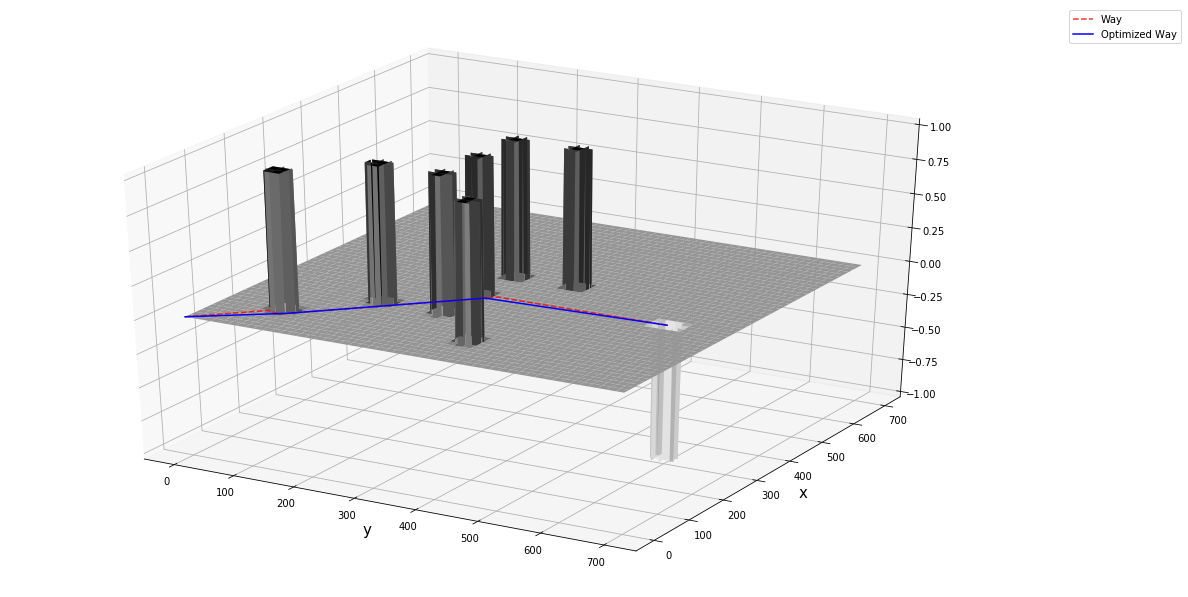

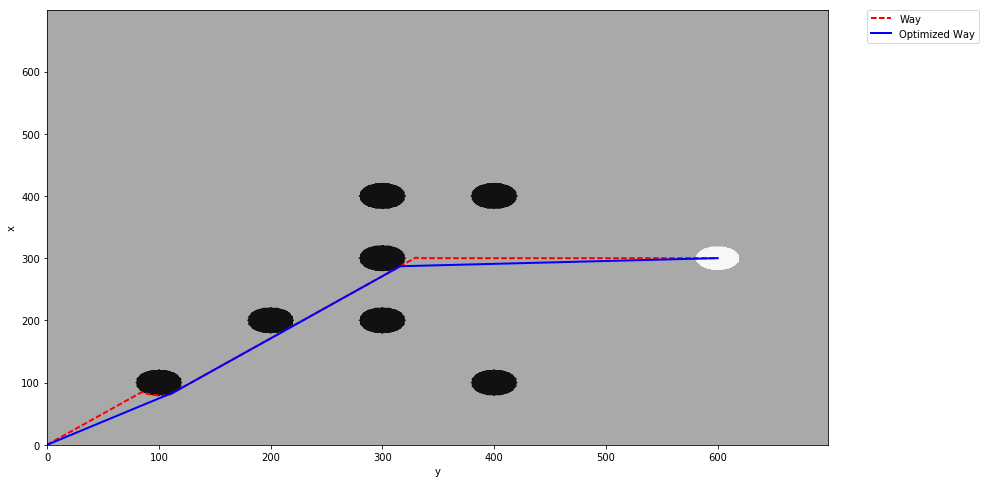

In [6]:
# Class Application

tab = sniffer(700, 700)

# goal
xg, yg = 600, 300
tab.setCircularGoal(x0=xg, y0=yg, r=20)
tab.setGoal(x=xg, y=yg, r=20)


# # obstacles
tab.setCircularObstacle(x0=300, y0=200, r=20)
tab.setCircularObstacle(x0=200, y0=200, r=20)
tab.setCircularObstacle(x0=100, y0=100, r=20)
tab.setCircularObstacle(x0=400, y0=100, r=20)
tab.setCircularObstacle(x0=300, y0=400, r=20)
tab.setCircularObstacle(x0=300, y0=300, r=20)
tab.setCircularObstacle(x0=400, y0=400, r=20)


x, y = tab.Sniff(i_max=1000, x0=0, y0=0, step=2, max_step=30)
print("Goal found in: x=" + str(x[-1]) + " y=" + str(y[-1]))
print("Steps of the way found", len(x))
print("Optimizing the way")
opx, opy = tab.wayOptimize(x, y)
print("Steps of the way found: ", len(opx))


#  ---------------- Charts -------------

### import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# cm = plt.cm.YlOrRd
cm = plt.cm.Greys

fig = plt.figure(figsize=(14, 8))
ax = Axes3D(fig)
ax.plot(x, y, 0, 'r--', label="Way", alpha=0.8)
ax.plot(opx, opy, 0, 'b', label="Optimized Way")
ax.plot_surface(tab.X, tab.Y, tab.potential, cmap=cm, alpha=1)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('x', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.contourf(tab.X, tab.Y, tab.potential, cmap=cm)
ax.plot(x, y, 'r--', linewidth=2, label="Way")
ax.plot(opx, opy, 'b', linewidth=2, label="Optimized Way")
ax.set_xlabel('y')
ax.set_ylabel('x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


<h3>Example 2</h3>

Iterations: 629
Final step 1
Path found:  True
Goal found in: x=650 y=50
Steps of the way found:  632
Optimizing the way...
Steps of the optimized way:  18


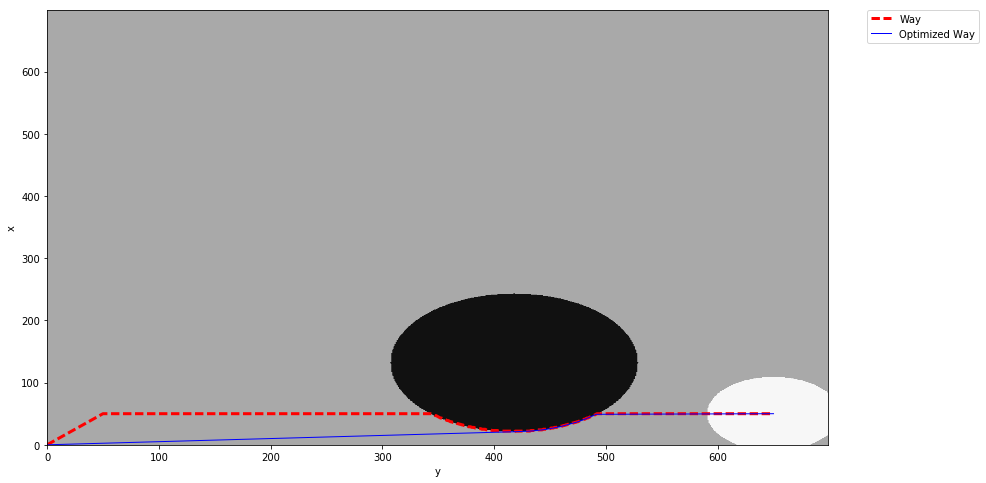

In [3]:
# Class Application

tab = sniffer(700, 700)

# goal
xg, yg = 650, 50
tab.setCircularGoal(x0=xg, y0=yg, r=60)
tab.setGoal(x=xg, y=yg, r=20)


# # obstacles
tab.setCircularObstacle(x0=418, y0=132, r=110)


# print(tab.potential)
x, y = tab.Sniff(i_max=1000, x0=0, y0=0, step=1, max_step=30)
print("Goal found in: x=" + str(x[-1]) + " y=" + str(y[-1]))
print("Steps of the way found: ", len(x))
print("Optimizing the way...")
opx, opy = tab.wayOptimize(x, y)
print("Steps of the optimized way: ", len(opx))
        

#  ---------------- Charts -------------

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.contourf(tab.X, tab.Y, tab.potential, cmap=cm)
ax.plot(x, y, 'r--', linewidth=3 , label="Way")
ax.plot(opx, opy, 'b', linewidth=1 , label="Optimized Way")
ax.set_xlabel('y')
ax.set_ylabel('x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<h3>Example 3</h3>

Iterations: 537
Final step 30
Path found:  True
Goal found in: x=600 y=400
Steps of the way found:  540
Optimizing the way...
Steps of the optimized way:  4


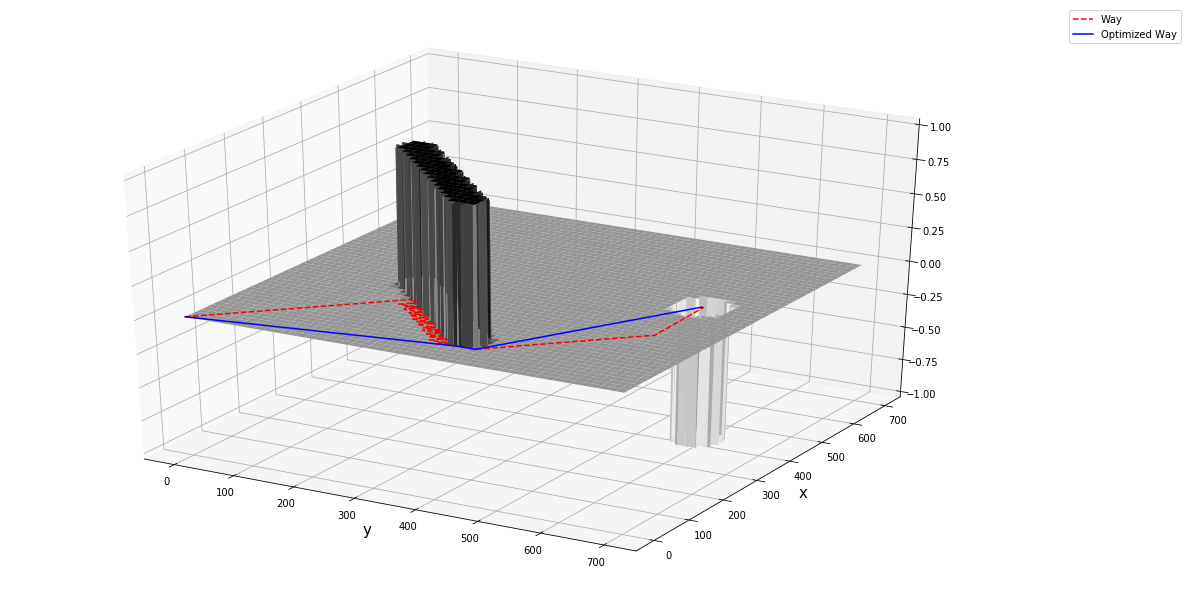

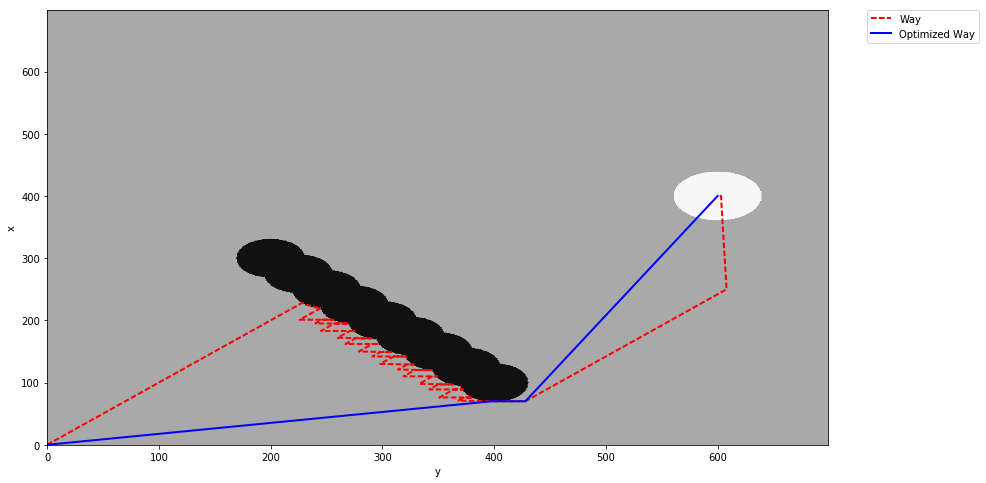

In [5]:
# Class Application

tab = sniffer(700, 700)

# goal
xg, yg = 600, 400
tab.setCircularGoal(x0=xg, y0=yg, r=40)
tab.setGoal(x=xg, y=yg, r=20)


# # obstacles

tab.setCircularObstacle(x0=400, y0=100, r=30)
tab.setCircularObstacle(x0=375, y0=125, r=30)
tab.setCircularObstacle(x0=350, y0=150, r=30)
tab.setCircularObstacle(x0=325, y0=175, r=30)
tab.setCircularObstacle(x0=300, y0=200, r=30)
tab.setCircularObstacle(x0=275, y0=225, r=30)
tab.setCircularObstacle(x0=250, y0=250, r=30)
tab.setCircularObstacle(x0=225, y0=275, r=30)
tab.setCircularObstacle(x0=200, y0=300, r=30)


# print(tab.potential)
x, y = tab.Sniff(i_max=1000, x0=0, y0=0, step=1, max_step=30)
print("Goal found in: x=" + str(x[-1]) + " y=" + str(y[-1]))
print("Steps of the way found: ", len(x))
print("Optimizing the way...")
opx, opy = tab.wayOptimize(x, y)
print("Steps of the optimized way: ", len(opx))


#  ---------------- Charts -------------

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# cm = plt.cm.YlOrRd
cm = plt.cm.Greys

fig = plt.figure(figsize=(14, 8))
ax = Axes3D(fig)
ax.plot_surface(tab.X, tab.Y, tab.potential, cmap=cm, alpha=1)
ax.plot(x, y, 0, 'r--', label="Way")
ax.plot(opx, opy, 0, 'b', label="Optimized Way")
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('x', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.contourf(tab.X, tab.Y, tab.potential, cmap=cm)
ax.plot(x, y, 'r--', linewidth=2, label="Way")
ax.plot(opx, opy, 'b', linewidth=2, label="Optimized Way")
ax.set_xlabel('y')
ax.set_ylabel('x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()